# Análise Exploratória dos Dados (EDA) #

In [2]:
#Importando bibliotecas para análise exploratória
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Lendo o arquivo Excel com os dados de custos de saúde
df = pd.read_excel('../data/raw/base_custos_saude.xlsx', engine='openpyxl')

# Exibindo as primeiras linhas do DataFrame
df.head()

,DtRef,Idade,Sexo,IMC,Qte_Filhos,Fumante,Regiao,Custo_Saude
0,202101,25,Masculino,26.220,0,Não,Nordeste,272.132080
1,202101,23,Masculino,17.385,1,Não,Norte,277.519215
2,202101,41,Masculino,21.780,1,Não,Sudeste,627.247720
3,202101,38,Masculino,37.050,1,Não,Nordeste,607.967150
4,202101,60,Feminino,24.530,0,Não,Sudeste,1262.989670


In [101]:
# Verificando valores duplicados 
df.duplicated().sum()

np.int64(0)

O data set é composto por 1338 observações, 8 variáveis, sendo a target: Custo_Saude, e as demais variáveis explicativas (Sexo, Fumante e Região sendo variáveis qualitativas e as demais quantitativas) com excessão de DtRef que é a variável contendo as datas. 
Não foram encontrados valores nulos ou duplicados na base 


# Análise Univariada dos Dados 
Analisando as variáveis de forma isolada para depois correlaciona-las com os Custos de Saúde (Target)

In [102]:
# Verificando gasto total da empresa com saúde
custo_total = df['Custo_Saude'].sum()
print(f'O total de custos com saúde da empresa foi de R$ {custo_total:,.2f}, com uma média de R$ {df['Custo_Saude'].mean():,.2f} por funcionário.')

#Verificando o custo mais alto e mais baixo
print(f'O custo mais alto foi de R$ {df['Custo_Saude'].max():,.2f} e o mais baixo foi de R$ {df['Custo_Saude'].min():,.2f}.')

print(f'Com um custo médio mensal de R$ {custo_total / df['DtRef'].nunique():,.2f} por mês.')

#Verificando todas as distribuições de custos de saúde
df['Custo_Saude'].describe()

O total de custos com saúde da empresa foi de R$ 1,775,582.50, com uma média de R$ 1,327.04 por funcionário.
O custo mais alto foi de R$ 6,377.04 e o mais baixo foi de R$ 112.19.
Com um custo médio mensal de R$ 147,965.21 por mês.


count    1338.000000
mean     1327.042227
std      1211.001124
min       112.187390
25%       474.028715
50%       938.203300
75%      1663.991252
max      6377.042801
Name: Custo_Saude, dtype: float64

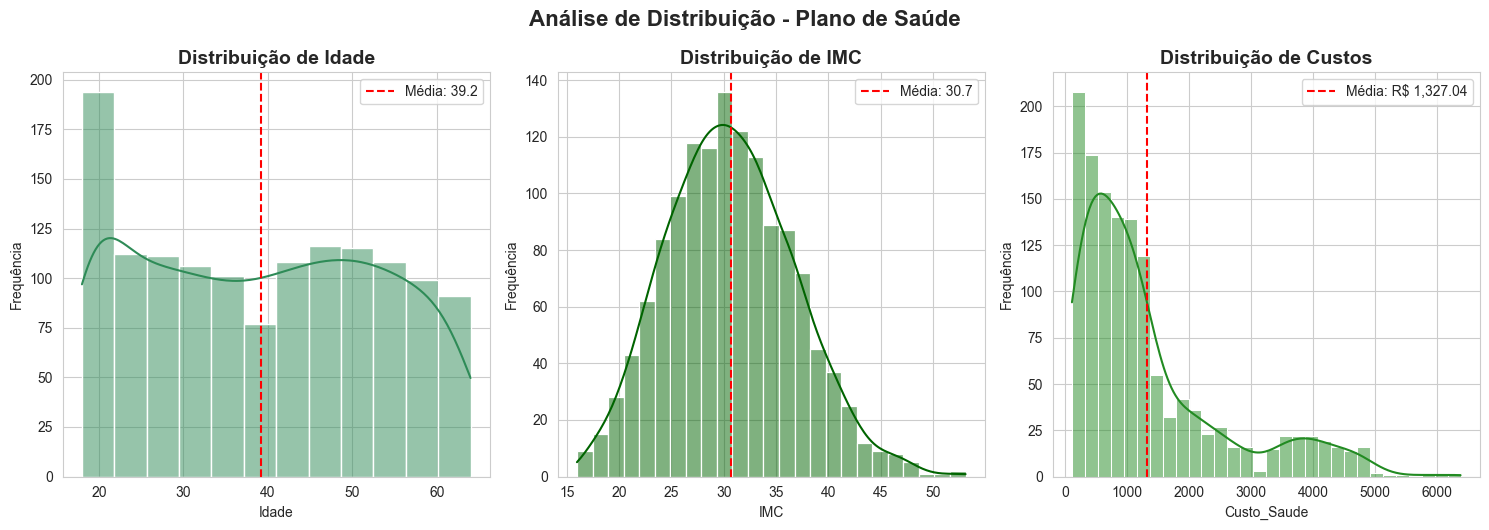

In [141]:
#Visualizando a distribuição das variáveis numéricas
#  Configura o estilo com tema verde
sns.set_style("whitegrid")  # Fundo com grid
sns.set_palette("Greens_r")  # Paleta de cores verde (invertida para ficar mais escuro)

# Criando a figura
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Histograma para idade
sns.histplot(df['Idade'], kde=True, ax=ax[0], color='seagreen')
ax[0].set_ylabel('Frequência')
ax[0].set_title('Distribuição de Idade', fontsize=14, fontweight='bold')
#Adicionando linha de média
mean_age = df['Idade'].mean()
ax[0].axvline(mean_age, color='red', linestyle='--', label=f'Média: {mean_age:.1f}')
ax[0].legend()

# Histograma para IMC
sns.histplot(df['IMC'], kde=True, ax=ax[1], color='darkgreen')
ax[1].set_ylabel('Frequência')
ax[1].set_title('Distribuição de IMC', fontsize=14, fontweight='bold')
# Adicionando linha de média
mean_imc = df['IMC'].mean()
ax[1].axvline(mean_imc, color='red', linestyle='--', label=f'Média: {mean_imc:.1f}')
ax[1].legend()

# Histograma para Custos
sns.histplot(df['Custo_Saude'], kde=True, ax=ax[2], color='forestgreen')
ax[2].set_ylabel('Frequência')
ax[2].set_title('Distribuição de Custos', fontsize=14, fontweight='bold')
# Adicionando linha de média
mean_cost = df['Custo_Saude'].mean()
ax[2].axvline(mean_cost, color='red', linestyle='--', label=f'Média: R$ {mean_cost:,.2f}')
ax[2].legend()

# Ajustando layout
plt.tight_layout()

# Adicionando título geral
fig.suptitle('Análise de Distribuição - Plano de Saúde', y=1.05, fontsize=16, fontweight='bold')

plt.show()

In [131]:
# Criando função para classificar o IMC 
def classificar_imc(IMC):
    """Classifica o IMC segundo os padrões da OMS"""
    if IMC < 18.5:
        return 'Abaixo do peso'
    elif 18.5 <= IMC < 25:
        return 'Peso normal'
    elif 25 <= IMC < 30:
        return 'Sobrepeso'
    elif 30 <= IMC < 35:
        return 'Obesidade Grau I'
    elif 35 <= IMC < 40:
        return 'Obesidade Grau II'
    else:
        return 'Obesidade Grau III'

# Aplicando a função de classificação do IMC
df['Classificacao_IMC'] = df['IMC'].apply(classificar_imc)

#Transformando a variável 'Classificacao_IMC' em dummies
df_imc_dummies = pd.get_dummies(df['Classificacao_IMC'], prefix='IMC', drop_first=True)
# Concatenando as dummies com o DataFrame original
df = pd.concat([df, df_imc_dummies], axis=1)    

# Visualizando o DataFrame atualizado
df.head()

,DtRef,Idade,Sexo,IMC,Qte_Filhos,Fumante,Regiao,Custo_Saude,Classificacao_IMC,IMC_Obesidade Grau I,IMC_Obesidade Grau II,IMC_Obesidade Grau III,IMC_Peso normal,IMC_Sobrepeso
0,202101,25,Masculino,26.220,0,Não,Nordeste,272.132080,Sobrepeso,False,False,False,False,True
1,202101,23,Masculino,17.385,1,Não,Norte,277.519215,Abaixo do peso,False,False,False,False,False
2,202101,41,Masculino,21.780,1,Não,Sudeste,627.247720,Peso normal,False,False,False,True,False
3,202101,38,Masculino,37.050,1,Não,Nordeste,607.967150,Obesidade Grau II,False,True,False,False,False
4,202101,60,Feminino,24.530,0,Não,Sudeste,1262.989670,Peso normal,False,False,False,True,False


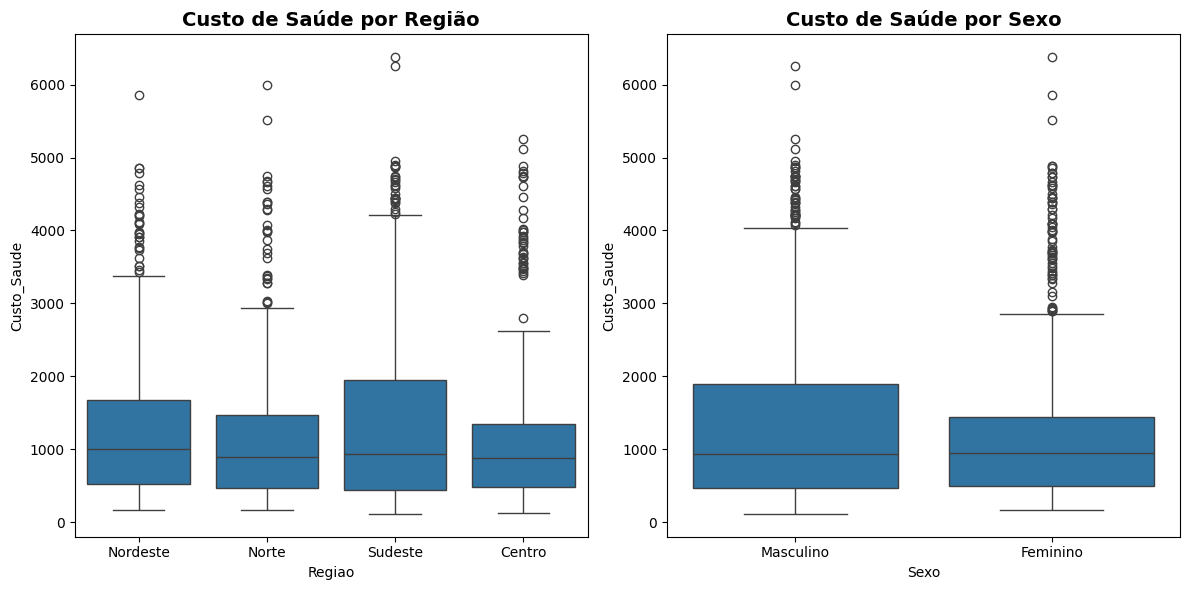

In [ ]:
# Visualizando a distribuição das variáveis categóricas correlacionadas ao Custo de Saúde
 
# Criando a figura
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

#Boxplot Regiao x Custo de Saúde
sns.boxplot(x='Regiao', y='Custo_Saude', data=df,  ax=ax[0])
ax[0].set_title('Custo de Saúde por Região', fontsize=14, fontweight='bold')

#Boxplot Classificacao_IMC x Custo de Saúde
sns.boxplot(x='Sexo', y='Custo_Saude', data=df, ax=ax[1])
ax[1].set_title('Custo de Saúde por Sexo', fontsize=14, fontweight='bold')
plt.tight_layout()

Text(0.5, 1.0, 'Custo de Saúde por Classificação IMC')

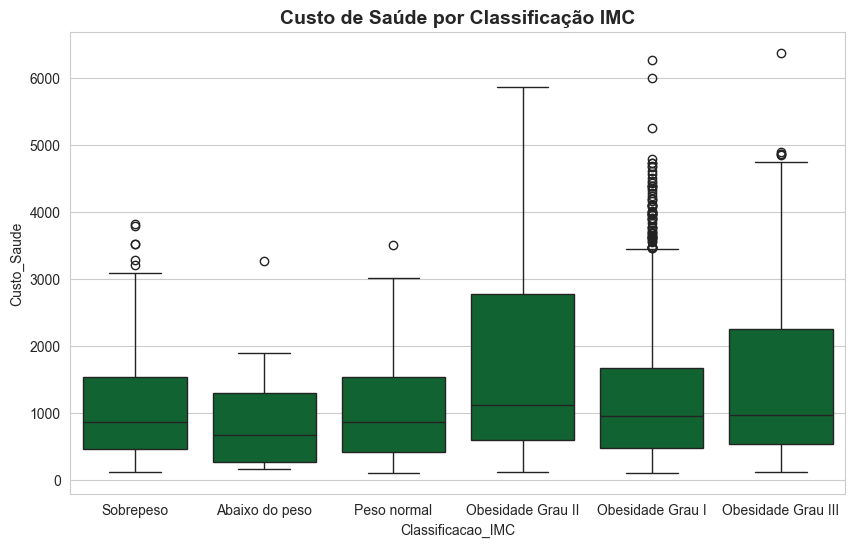

In [126]:
#Boxplot Classificacao_IMC x Custo de Saúde
plt.figure(figsize=(10, 6))
sns.boxplot(x='Classificacao_IMC', y='Custo_Saude', data=df)
plt.title('Custo de Saúde por Classificação IMC', fontsize=14, fontweight='bold')

In [148]:
#Custos de Saúde agrupados por Classificação IMC
custo_imc = df.groupby('Classificacao_IMC')['Custo_Saude'].mean().reset_index()
custo_imc = custo_imc.sort_values(by='Custo_Saude', ascending=False)
# Exibindo os custos médios por classificação IMC
print(custo_imc)



    Classificacao_IMC  Custo_Saude
2   Obesidade Grau II  1702.225888
3  Obesidade Grau III  1678.461555
1    Obesidade Grau I  1441.967497
5           Sobrepeso  1098.750989
4         Peso normal  1040.933771
0      Abaixo do peso   885.220059


In [149]:
#Custos de saúde agrupados por sexo 
custo_sexo = df.groupby('Sexo')['Custo_Saude'].mean().reset_index()
custo_sexo = custo_sexo.sort_values(by='Custo_Saude', ascending=False)
# Exibindo os custos médios por sexo
print(custo_sexo)

        Sexo  Custo_Saude
1  Masculino  1395.675118
0   Feminino  1256.957884


In [150]:
#Custo de saúde agrupados por região
custo_regiao = df.groupby('Regiao')['Custo_Saude'].mean().reset_index()
custo_regiao = custo_regiao.sort_values(by='Custo_Saude', ascending=False)
# Exibindo os custos médios por região
print(custo_regiao)

     Regiao  Custo_Saude
3   Sudeste  1473.541144
1  Nordeste  1340.638452
2     Norte  1241.757537
0    Centro  1234.693738


Observamos que indivíduos com Obesidade Grau II possuem um custo em saúde 28,27% maior que a média por funcionário de R$ 1.327,04

Text(0.5, 1.0, 'Custo de Saúde por Fumante')

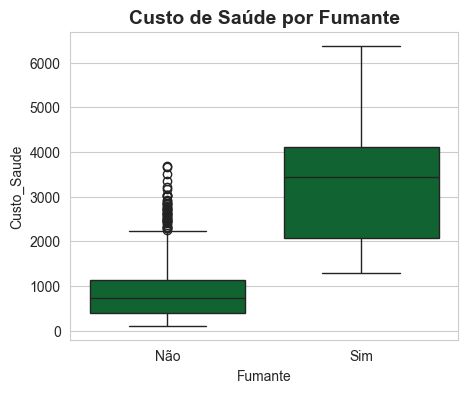

In [139]:
#Boxplot Fumante x Custo de Saúde
plt.figure(figsize=(5, 4))
sns.boxplot(x='Fumante', y='Custo_Saude', data=df)
plt.title('Custo de Saúde por Fumante', fontsize=14, fontweight='bold')

In [151]:
#Custos de saúde agrupados por ser ou não fumante
custo_fumante = df.groupby('Fumante')['Custo_Saude'].mean().reset_index()
custo_fumante = custo_fumante.sort_values(by='Custo_Saude', ascending=False)
# Exibindo os custos médios por ser ou não fumante
print(custo_fumante)

  Fumante  Custo_Saude
1     Sim  3205.023183
0     Não   843.426830


Podemos observar uma diferença importante nos custos de saúde entre Fumantes e Não fumantes, isso pode destacar a importancia da variável em relação aos gastos com saúde

In [184]:
#Criando variáveis dummies para avaliar a correlação com o custo de saúde
# Criar dummies para variáveis categóricas
df_dummies = pd.get_dummies(df, columns=['Fumante', 'Sexo', 'Regiao'], drop_first=True)

Vamos levar em consideração apenas as variáveis que demonstraram maior relação com os custos em saúde, como já transformamos as variáveis em dummies, isso evitará multicolinearidade entre os dados

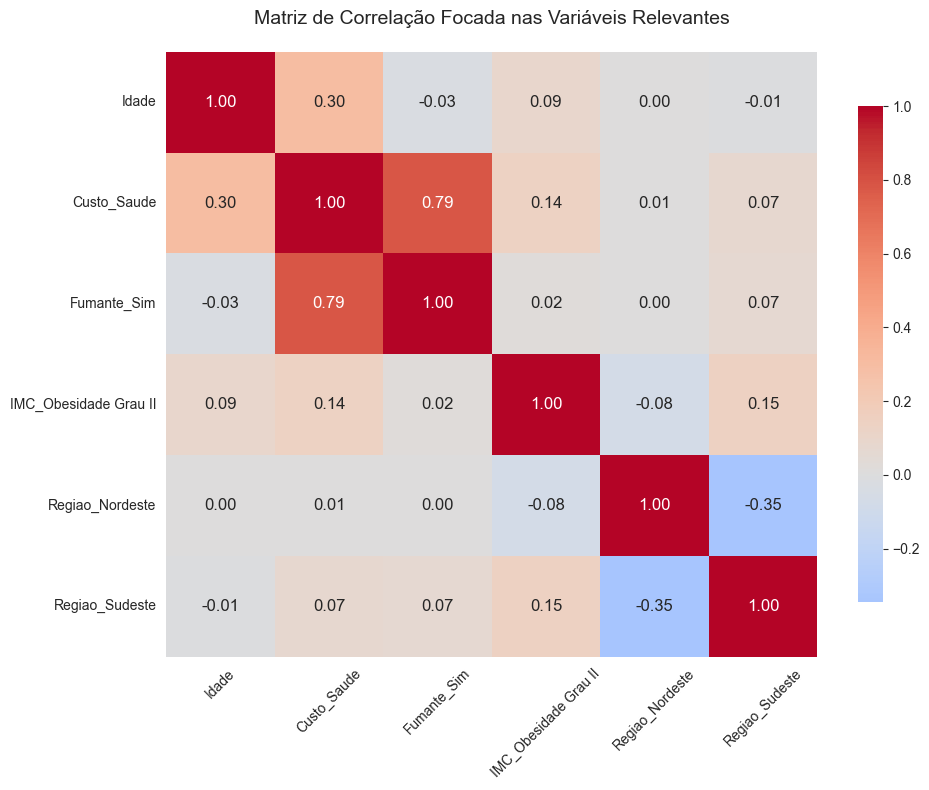

In [182]:
# Define variáveis selecionadas (apenas nomes das colunas)
vars_selecionadas = [
    'Idade',
    'Custo_Saude',
    'Fumante_Sim',
    'IMC_Obesidade Grau II',  # Escolha uma categoria de IMC
    'Regiao_Nordeste',
    'Regiao_Sudeste'
]

# Verifica se todas as colunas existem no DataFrame
colunas_faltantes = [col for col in vars_selecionadas if col not in df_dummies.columns]
if colunas_faltantes:
    raise ValueError(f"Colunas não encontradas: {colunas_faltantes}")

# Cria matriz de correlação
corr_focada = df_dummies[vars_selecionadas].corr()

# Plotando matriz de correlação 
plt.figure(figsize=(10, 8))
sns.heatmap(corr_focada, annot=True, fmt=".2f", cmap='coolwarm', center=0,
           annot_kws={"size": 12}, cbar_kws={"shrink": .82})
plt.title('Matriz de Correlação Focada nas Variáveis Relevantes', pad=20, fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Ser fumante demonstrou alta correlação com o aumento dos custos de saúde, seguido de idade e ter obesidade grau II 

In [185]:
#Para finalizar iremos tratar a variável DtRef, transformando em variável datetime e extraindo o mês e o ano para futuras análises
df_dummies['DtRef'] = pd.to_datetime(df_dummies['DtRef'], format='%Y%m')
df_dummies['Ano'] = df_dummies['DtRef'].dt.year
df_dummies['Mes'] = df_dummies['DtRef'].dt.month

#Retirando a coluna DtRef, pois não será mais necessária
df_dummies.drop(columns=['DtRef'], inplace=True)
#Visualizando o DataFrame atualizado



In [186]:
#Visualizando o DataFrame atualizado
df_dummies.head()

,Idade,IMC,Qte_Filhos,Custo_Saude,Classificacao_IMC,IMC_Obesidade Grau I,IMC_Obesidade Grau II,IMC_Obesidade Grau III,IMC_Peso normal,IMC_Sobrepeso,Ano,Mes,Fumante_Sim,Sexo_Masculino,Regiao_Nordeste,Regiao_Norte,Regiao_Sudeste
0,25,26.220,0,272.132080,Sobrepeso,False,False,False,False,True,2021,1,False,True,True,False,False
1,23,17.385,1,277.519215,Abaixo do peso,False,False,False,False,False,2021,1,False,True,False,True,False
2,41,21.780,1,627.247720,Peso normal,False,False,False,True,False,2021,1,False,True,False,False,True
3,38,37.050,1,607.967150,Obesidade Grau II,False,True,False,False,False,2021,1,False,True,True,False,False
4,60,24.530,0,1262.989670,Peso normal,False,False,False,True,False,2021,1,False,False,False,False,True


In [187]:
df_dummies.shape

(1338, 17)

In [189]:
#Salvando o DataFrame processado em um novo arquivo CSV
df_final = df_dummies.to_csv('../data/processed/df_final.csv', index=False)